# **Upload Dataset**
import pandas กับ google collab file

In [ ]:
import pandas as pd
from google.colab import files

holdoutUpload = files.upload()
holdoutDownload = files.upload()

Saving cell2cellholdout.csv to cell2cellholdout.csv


Saving cell2celltrain.csv to cell2celltrain.csv


#**Read csv.**

In [ ]:
df_holdout = pd.read_csv("cell2cellholdout.csv")
df_train = pd.read_csv("cell2celltrain.csv")

df_train

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,CustomerCareCalls,OutboundCalls,InboundCalls,MonthsInService,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,MadeCallToRetentionTeam,CreditRating
0,3000002,Yes,24.00,219.0,22.0,0.0,0.0,0.0,0.0,0.0,61,Yes,Yes,No,No,Yes,1-Highest
1,3000010,Yes,16.99,10.0,17.0,0.0,0.0,0.0,0.0,0.0,58,Yes,Yes,Yes,No,No,4-Medium
2,3000014,No,38.00,8.0,38.0,0.0,0.0,0.0,0.3,0.0,60,No,Yes,Yes,No,No,3-Good
3,3000022,No,82.28,1312.0,75.0,0.0,0.0,4.3,370.3,147.0,59,No,Yes,Yes,No,No,4-Medium
4,3000026,Yes,17.14,0.0,17.0,0.0,0.0,0.0,0.0,0.0,53,Yes,Yes,No,Yes,No,1-Highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,0.0,17.0,1.3,29,No,Yes,No,No,No,1-Highest
51043,3399974,No,95.17,1745.0,85.0,45.0,4.7,0.0,89.7,33.3,29,Yes,Yes,No,No,No,3-Good
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,1.3,430.3,87.7,25,No,Yes,No,No,No,5-Low
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,31,No,No,No,No,No,5-Low


# **Deal with missing values**


In [ ]:
df_train = df_train.fillna(df_train.mean())
df_holdout = df_holdout.fillna(df_holdout.mean())

In [ ]:
df_train

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,CustomerCareCalls,OutboundCalls,InboundCalls,MonthsInService,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,MadeCallToRetentionTeam,CreditRating
0,3000002,Yes,24.000000,219.000000,22.000000,0.000000,0.000000,0.0,0.0,0.0,61,Yes,Yes,No,No,Yes,1-Highest
1,3000010,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.0,0.0,0.0,58,Yes,Yes,Yes,No,No,4-Medium
2,3000014,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.0,0.3,0.0,60,No,Yes,Yes,No,No,3-Good
3,3000022,No,82.280000,1312.000000,75.000000,0.000000,0.000000,4.3,370.3,147.0,59,No,Yes,Yes,No,No,4-Medium
4,3000026,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.0,0.0,0.0,53,Yes,Yes,No,Yes,No,1-Highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.834492,525.653416,46.830088,40.027785,1.236244,0.0,17.0,1.3,29,No,Yes,No,No,No,1-Highest
51043,3399974,No,95.170000,1745.000000,85.000000,45.000000,4.700000,0.0,89.7,33.3,29,Yes,Yes,No,No,No,3-Good
51044,3399978,Yes,58.834492,525.653416,46.830088,40.027785,1.236244,1.3,430.3,87.7,25,No,Yes,No,No,No,5-Low
51045,3399990,No,58.834492,525.653416,46.830088,40.027785,1.236244,0.0,0.0,0.0,31,No,No,No,No,No,5-Low


# **Set Label and Change Dataset to One-Hot Encoding**
เพื่อให้การ classification เป็นไปได้ง่ายขึ้นเราจะทำการ **One-Hot Encoding** เพื่อที่จะเปลี่ยน Attribute ประเภท categorical ให้เป็นคอลัมน์ย่อย ๆ ในกรณีของ Dataset ชุดนี้ก็คือ Attribute = '**CreditRating**'

In [ ]:
train_x = df_train.drop("Churn", axis=1).copy()
train_y = df_train["Churn"].copy()

train_x_encode = pd.get_dummies(train_x, columns=["CreditRating"])

train_x_encode.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,CustomerCareCalls,OutboundCalls,InboundCalls,MonthsInService,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,MadeCallToRetentionTeam,CreditRating_1-Highest,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest
0,3000002,24.00,219.0,22.0,0.0,0.0,0.0,0.0,0.0,61,Yes,Yes,No,No,Yes,1,0,0,0,0,0,0
1,3000010,16.99,10.0,17.0,0.0,0.0,0.0,0.0,0.0,58,Yes,Yes,Yes,No,No,0,0,0,1,0,0,0
2,3000014,38.00,8.0,38.0,0.0,0.0,0.0,0.3,0.0,60,No,Yes,Yes,No,No,0,0,1,0,0,0,0
3,3000022,82.28,1312.0,75.0,0.0,0.0,4.3,370.3,147.0,59,No,Yes,Yes,No,No,0,0,0,1,0,0,0
4,3000026,17.14,0.0,17.0,0.0,0.0,0.0,0.0,0.0,53,Yes,Yes,No,Yes,No,1,0,0,0,0,0,0


# **Import Module for classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

เราจะทำการ Encode Data ประเภท Binominal ให้เปลี่ยนจาก 'Yes' กับ 'No' เป็น 1 และ 0

In [ ]:
def label_encode(label):
  if label == "Yes" or label == 1:
    return 1
  else:
    return 0

In [ ]:
train_x_encode["OwnsComputer"] = train_x_encode["OwnsComputer"].map({'Yes':1 ,'No':0})
train_x_encode["HasCreditCard"] = train_x_encode["HasCreditCard"].map({'Yes':1 ,'No':0}) 
train_x_encode["NewCellphoneUser"] = train_x_encode["NewCellphoneUser"].map({'Yes':1 ,'No':0}) 
train_x_encode["NotNewCellphoneUser"] = train_x_encode["NotNewCellphoneUser"].map({'Yes':1 ,'No':0}) 
train_x_encode["MadeCallToRetentionTeam"] = train_x_encode["MadeCallToRetentionTeam"].map({'Yes':1 ,'No':0})

In [ ]:
train_x_encode

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,CustomerCareCalls,OutboundCalls,InboundCalls,MonthsInService,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,MadeCallToRetentionTeam,CreditRating_1-Highest,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest
0,3000002,24.000000,219.000000,22.000000,0.000000,0.000000,0.0,0.0,0.0,61,1,1,0,0,1,1,0,0,0,0,0,0
1,3000010,16.990000,10.000000,17.000000,0.000000,0.000000,0.0,0.0,0.0,58,1,1,1,0,0,0,0,0,1,0,0,0
2,3000014,38.000000,8.000000,38.000000,0.000000,0.000000,0.0,0.3,0.0,60,0,1,1,0,0,0,0,1,0,0,0,0
3,3000022,82.280000,1312.000000,75.000000,0.000000,0.000000,4.3,370.3,147.0,59,0,1,1,0,0,0,0,0,1,0,0,0
4,3000026,17.140000,0.000000,17.000000,0.000000,0.000000,0.0,0.0,0.0,53,1,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,58.834492,525.653416,46.830088,40.027785,1.236244,0.0,17.0,1.3,29,0,1,0,0,0,1,0,0,0,0,0,0
51043,3399974,95.170000,1745.000000,85.000000,45.000000,4.700000,0.0,89.7,33.3,29,1,1,0,0,0,0,0,1,0,0,0,0
51044,3399978,58.834492,525.653416,46.830088,40.027785,1.236244,1.3,430.3,87.7,25,0,1,0,0,0,0,0,0,0,1,0,0
51045,3399990,58.834492,525.653416,46.830088,40.027785,1.236244,0.0,0.0,0.0,31,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_y = train_y.apply(label_encode)

# **ทำการ Split Dataset และสร้าง Decision Tree(Gini_index)**

In [ ]:
x_train,x_valid, y_train, y_valid = train_test_split(train_x_encode, train_y)

clf_dt = DecisionTreeClassifier(criterion= "gini", max_depth= 8)
clf_dt = clf_dt.fit(x_train, y_train)

# **Visualization**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

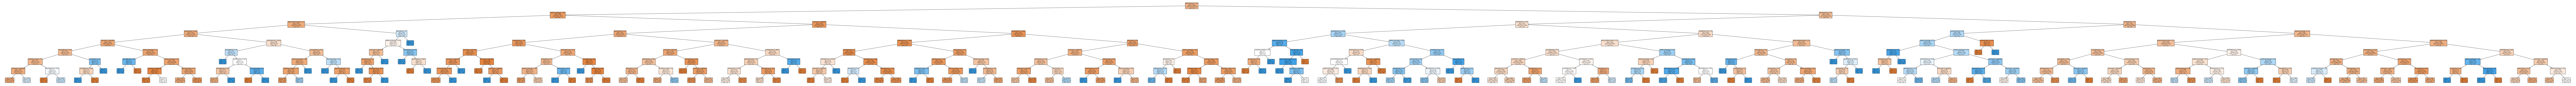

In [ ]:
plt.figure(figsize=(300, 10),dpi=100)
plot_tree(clf_dt,
          filled = True,
          rounded = True,
          class_names = ["No","Yes"],
          feature_names = x_train.columns)
plt

# **Confusion Matrix visualization**
**(ตารางวัดประสิทธิภาพการทำงานของ Machine Learning)**

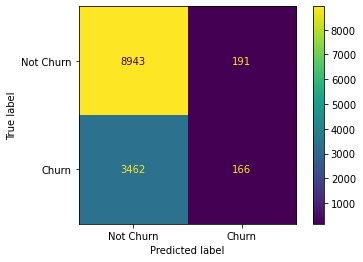

In [ ]:
plot_confusion_matrix(clf_dt, x_valid, y_valid, display_labels=["Not Churn", "Churn"],values_format="d")

# **Accuracy Test**

In [ ]:
train_scores = [clf_dt.score(x_train, y_train)]

In [ ]:
from sklearn.model_selection import cross_val_score

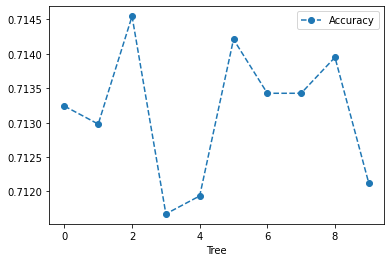

In [ ]:
clf_dt = DecisionTreeClassifier(ccp_alpha=0.001)

scores = cross_val_score(clf_dt, x_train, y_train, cv=10)
df = pd.DataFrame(data={"Tree":range(10), "Accuracy":scores})

df.plot(x="Tree", y="Accuracy", marker="o", linestyle="--")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
clf_dt = clf_dt.fit(x_train,y_train)
prediction = clf_dt.predict(x_valid)
print(classification_report(y_valid, prediction))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      9134
           1       0.54      0.02      0.04      3628

    accuracy                           0.72     12762
   macro avg       0.63      0.51      0.43     12762
weighted avg       0.67      0.72      0.61     12762



# **การวัดความแม่นยำด้วย Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(x_train,y_train)
y_pred = clf_NB.predict(x_train)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train,y_pred))

Accuracy: 0.7098863784772104
